In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import collections
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py # visualization
py.init_notebook_mode(connected=True) # visualization
import plotly.graph_objs as go

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# pipeline
from sklearn.pipeline import Pipeline
# metrics
from sklearn.metrics import accuracy_score, confusion_matrix
import logging


# Create a logger
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)  # Set the logger to the lowest level to capture all messages

# Create handlers
file_handler = logging.FileHandler('Model_training.log')
console_handler = logging.StreamHandler()

# Set level for handlers
file_handler.setLevel(logging.DEBUG)
console_handler.setLevel(logging.DEBUG)

# Create a logging format
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
file_handler.setFormatter(formatter)
console_handler.setFormatter(formatter)

# Add handlers to the logger
logger.addHandler(file_handler)
logger.addHandler(console_handler)


## Data Gathering

In [2]:
logger.info("Importing the dataset into a dataframe started")
df = pd.read_csv('DS_customer_cancellation.csv')
logger.info("Importing the dataset into a dataframe Completed")

2024-07-03 19:46:50,335 - __main__ - INFO - Importing the dataset into a dataframe started
INFO:__main__:Importing the dataset into a dataframe started
2024-07-03 19:46:50,429 - __main__ - INFO - Importing the dataset into a dataframe Completed
INFO:__main__:Importing the dataset into a dataframe Completed


## Data Understanding

In [3]:
def dataoveriew(df, message):
    """
      Understanding the data set

      Args:
          df : Raw dataframe
          message : Message for the function call

    """
    logger.info(f'{message} started :\n')
    print("Top 5 rows", df.head())
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nMissing values based on each feature:", df.isnull().sum())
    print("\nUnique values:")
    print(df.nunique())
    print("\nData Types:")
    print(df.info())
    logger.info(f'{message} completed :\n')

##Data Cleaning

In [4]:
def impute_missing_value(data, message):
    """
      Imputing the missing values in the data

      Args:
          data : Raw dataframe
          message : Message for the function call

    """
    logger.info(f'{message} Started')
    data['Offer'] = data['Offer'].fillna("No Offer")
    #print("After filling missing values for Offer Attribute ",df['Offer'].unique(),df['Offer'].isnull().sum())
    # Impute missing values in 'MonthlyCharges' with 0 only for customers without 'PhoneService'
    data.loc[data['Phone Service'] == 'No', 'Avg Monthly Long Distance Charges'] = data.loc[data['Phone Service'] == 'No', 'Avg Monthly Long Distance Charges'].fillna(0)
    data.loc[data['Phone Service'] == 'No', 'Multiple Lines'] = data.loc[data['Phone Service'] == 'No', 'Multiple Lines'].fillna("No")
    data['Internet Type'] = data['Internet Type'].fillna("No Internet Type")
    data.loc[data['Internet Service'] == 'No', 'Avg Monthly GB Download'] = data.loc[data['Internet Service'] == 'No', 'Avg Monthly GB Download'].fillna(0)
    data.loc[data['Internet Service'] == 'No', 'Online Security'] = data.loc[data['Internet Service'] == 'No', 'Online Security'].fillna("No")
    data.loc[data['Internet Service'] == 'No', 'Online Backup'] = data.loc[data['Internet Service'] == 'No', 'Online Backup'].fillna("No")
    data.loc[data['Internet Service'] == 'No', 'Device Protection Plan'] = data.loc[data['Internet Service'] == 'No', 'Device Protection Plan'].fillna("No")
    data.loc[data['Internet Service'] == 'No', 'Premium Tech Support'] = data.loc[data['Internet Service'] == 'No', 'Premium Tech Support'].fillna("No")
    data.loc[data['Internet Service'] == 'No', 'Streaming TV'] = data.loc[data['Internet Service'] == 'No', 'Streaming TV'].fillna("No")
    data.loc[data['Internet Service'] == 'No', 'Streaming Movies'] = data.loc[data['Internet Service'] == 'No', 'Streaming Movies'].fillna("No")
    data.loc[data['Internet Service'] == 'No', 'Streaming Music'] = data.loc[data['Internet Service'] == 'No', 'Streaming Music'].fillna("No")
    data.loc[data['Internet Service'] == 'No', 'Unlimited Data'] = data.loc[data['Internet Service'] == 'No', 'Unlimited Data'].fillna("No")
    data['Cancellation Category'] = data['Cancellation Category'].fillna("No Category")
    data['Cancellation Reason'] = data['Cancellation Reason'].fillna("No Reason")
    print("\nMissing values based on each feature:\n", data.isnull().sum())
    logger.info(f'{message} Completed')

In [5]:
def check_object_datatype(data, message):
    """
      Understanding the  Object datatype data

      Args:
          data : Updated dataframe
          message : Message for the function call

    """
    logger.info(f'{message} Started')
    # apply loop check unique value without int or float in dataset
    for col in data.columns:
        if data[col].dtype != 'int64' and data[col].dtype != 'float64':
            print(f'{col} : {data[col].unique()}')
    logger.info(f'{message} Completed')

In [6]:
def update_customer_status(data, message):
    """
      Updating the Customer Status of 'Stayed', 'Joined' to 'No Churn' and 'Churned' to 'Churn'

      Args:
          data : Updated dataframe
          message : Message for the function call

    """
    logger.info(f'{message} started')
    data['Customer Status'] = np.where(data['Customer Status'].isin(['Stayed', 'Joined']), 'No Churn', 'Churn')
    print("After Customer Status is updated with Churn and No Churn", data['Customer Status'].unique())
    churn_mapping = {'No Churn': 0, 'Churn': 1}
    data['Customer Status'] = data['Customer Status'].map(churn_mapping)
    logger.info(f'{message} completed')


In [7]:
dataoveriew(df, 'Overiew of the dataset')

2024-07-03 19:46:50,569 - __main__ - INFO - Overiew of the dataset started :

INFO:__main__:Overiew of the dataset started :

2024-07-03 19:46:50,700 - __main__ - INFO - Overiew of the dataset completed :

INFO:__main__:Overiew of the dataset completed :



Top 5 rows   Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra

In [8]:
impute_missing_value(df,"Impute missing values")

2024-07-03 19:46:50,731 - __main__ - INFO - Impute missing values Started
INFO:__main__:Impute missing values Started
2024-07-03 19:46:50,842 - __main__ - INFO - Impute missing values Completed
INFO:__main__:Impute missing values Completed



Missing values based on each feature:
 Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music         

In [9]:
check_object_datatype(df,"Understanding the Object data and its values")

2024-07-03 19:46:50,863 - __main__ - INFO - Understanding the Object data and its values Started
INFO:__main__:Understanding the Object data and its values Started
2024-07-03 19:46:50,927 - __main__ - INFO - Understanding the Object data and its values Completed
INFO:__main__:Understanding the Object data and its values Completed


Customer ID : ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Gender : ['Female' 'Male']
Married : ['Yes' 'No']
City : ['Frazier Park' 'Glendale' 'Costa Mesa' ... 'Jacumba' 'Carpinteria'
 'Meadow Valley']
Offer : ['No Offer' 'Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C']
Phone Service : ['Yes' 'No']
Multiple Lines : ['No' 'Yes']
Internet Service : ['Yes' 'No']
Internet Type : ['Cable' 'Fiber Optic' 'DSL' 'No Internet Type']
Online Security : ['No' 'Yes']
Online Backup : ['Yes' 'No']
Device Protection Plan : ['No' 'Yes']
Premium Tech Support : ['Yes' 'No']
Streaming TV : ['Yes' 'No']
Streaming Movies : ['No' 'Yes']
Streaming Music : ['No' 'Yes']
Unlimited Data : ['Yes' 'No']
Contract : ['One Year' 'Month-to-Month' 'Two Year']
Paperless Billing : ['Yes' 'No']
Payment Method : ['Credit Card' 'Bank Withdrawal' 'Mailed Check']
Customer Status : ['Stayed' 'Churned' 'Joined']
Cancellation Category : ['No Category' 'Competitor' 'Dissatisfaction' 'Other'

In [10]:
update_customer_status(df, "Updating the Customer Status of 'Stayed', 'Joined' to 'No Churn' and 'Churned' to 'Churn' ")

2024-07-03 19:46:50,956 - __main__ - INFO - Updating the Customer Status of 'Stayed', 'Joined' to 'No Churn' and 'Churned' to 'Churn'  started
INFO:__main__:Updating the Customer Status of 'Stayed', 'Joined' to 'No Churn' and 'Churned' to 'Churn'  started
2024-07-03 19:46:50,987 - __main__ - INFO - Updating the Customer Status of 'Stayed', 'Joined' to 'No Churn' and 'Churned' to 'Churn'  completed
INFO:__main__:Updating the Customer Status of 'Stayed', 'Joined' to 'No Churn' and 'Churned' to 'Churn'  completed


After Customer Status is updated with Churn and No Churn ['No Churn' 'Churn']


## Exploratory Data Analysis

2024-07-03 19:46:51,003 - __main__ - INFO - Exploratory Data Analysis started
INFO:__main__:Exploratory Data Analysis started


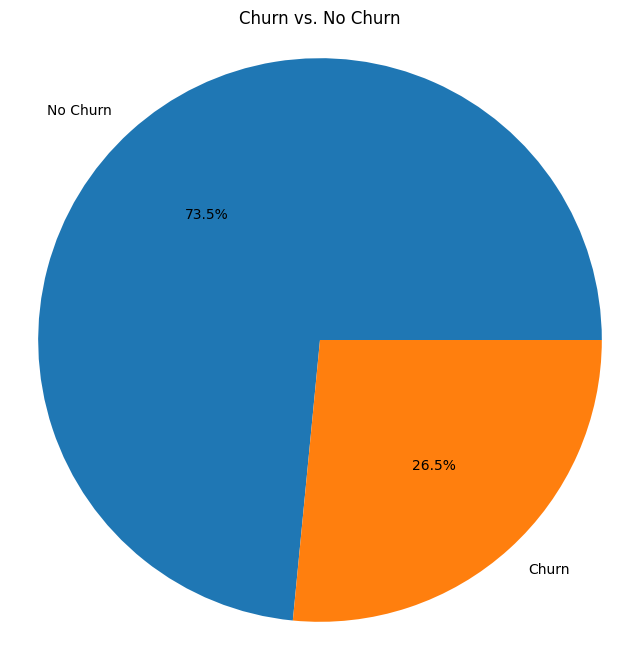

In [11]:
logger.info(f'Exploratory Data Analysis started')

churn_counts = df['Customer Status'].value_counts()

# Prepare the data for the pie chart
labels = ['No Churn', 'Churn']
sizes = [churn_counts[0], churn_counts[1]]
colors = ['gold', 'yellowgreen']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels,  autopct='%1.1f%%')
plt.title('Churn vs. No Churn')
plt.axis('equal')  # Equal aspect ratio ensures that pie is circular.
plt.show()

In [12]:
logger.info(f'Understanding the Categorical,  Numerical, Categorical but Cardinal Columns started')

categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

cardinal_categorical_cols = []
for col in categorical_cols:
    if df[col].nunique() > 10:
        cardinal_categorical_cols.append(col)

logger.info("Categorical Columns:")
logger.info(categorical_cols)
logger.info("Numerical Columns:")
logger.info(numerical_cols)
logger.info("Categorical but Cardinal Columns:")
logger.info(cardinal_categorical_cols)

logger.info(f'Understanding the Categorical,  Numerical, Categorical but Cardinal Columns completed')

2024-07-03 19:46:51,278 - __main__ - INFO - Understanding the Categorical,  Numerical, Categorical but Cardinal Columns started
INFO:__main__:Understanding the Categorical,  Numerical, Categorical but Cardinal Columns started
2024-07-03 19:46:51,317 - __main__ - INFO - Categorical Columns:
INFO:__main__:Categorical Columns:
2024-07-03 19:46:51,326 - __main__ - INFO - ['Customer ID', 'Gender', 'Married', 'City', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Cancellation Category', 'Cancellation Reason']
INFO:__main__:['Customer ID', 'Gender', 'Married', 'City', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Str

In [13]:
logger.info(f'Dropping the Categorical but Cardinal Columns started')
df = df.drop(cardinal_categorical_cols, axis=1)
logger.info("Remaining Columns:")
logger.info(df.columns)

logger.info(f'Dropping the Categorical but Cardinal Columns Completed')

2024-07-03 19:46:51,434 - __main__ - INFO - Dropping the Categorical but Cardinal Columns started
INFO:__main__:Dropping the Categorical but Cardinal Columns started
2024-07-03 19:46:51,445 - __main__ - INFO - Remaining Columns:
INFO:__main__:Remaining Columns:
2024-07-03 19:46:51,469 - __main__ - INFO - Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'Zip Code',
       'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months',
       'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Customer

In [14]:
logger.info(f'Binning the Age into 0-20, 21-40, 41-60, 61-80, 81-100 started')
df['Age_bins'] = pd.cut(df['Age'], bins=5, labels=['0-20', '21-40', '41-60', '61-80', '81-100'])
logger.info(f'Binning the Age into 0-20, 21-40, 41-60, 61-80, 81-100 completed')

2024-07-03 19:46:51,497 - __main__ - INFO - Binning the Age into 0-20, 21-40, 41-60, 61-80, 81-100 started
INFO:__main__:Binning the Age into 0-20, 21-40, 41-60, 61-80, 81-100 started
2024-07-03 19:46:51,515 - __main__ - INFO - Binning the Age into 0-20, 21-40, 41-60, 61-80, 81-100 completed
INFO:__main__:Binning the Age into 0-20, 21-40, 41-60, 61-80, 81-100 completed


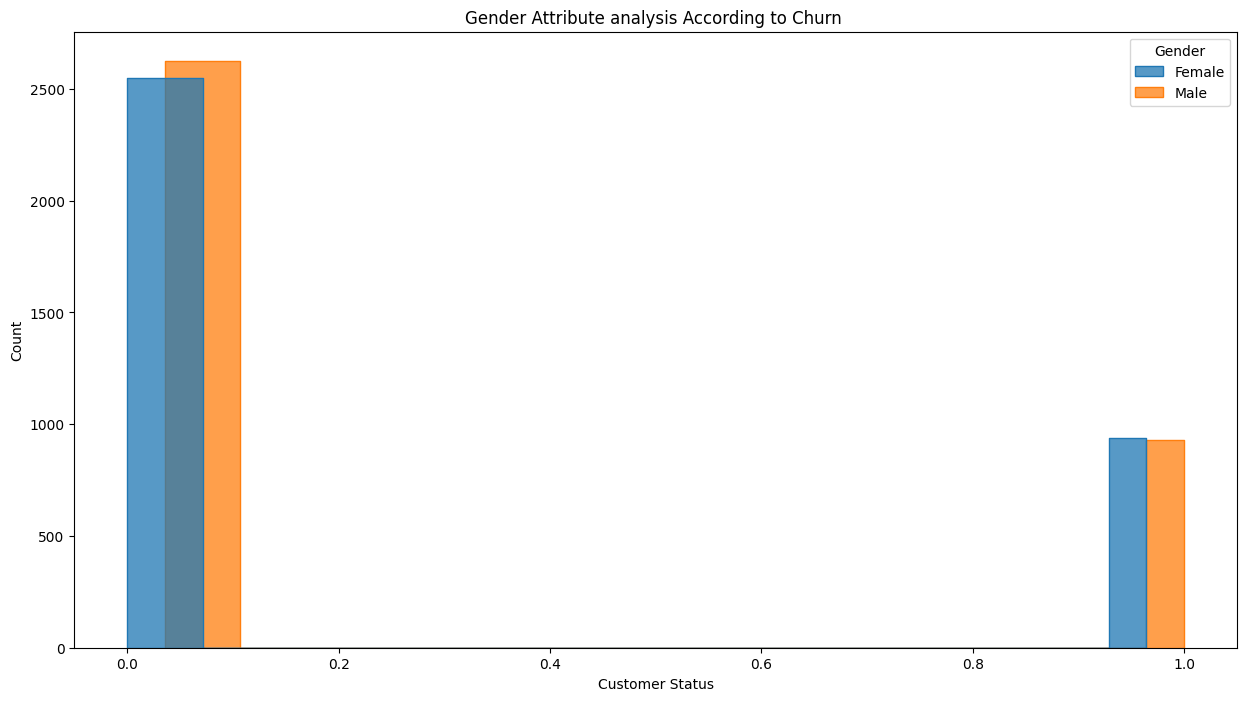

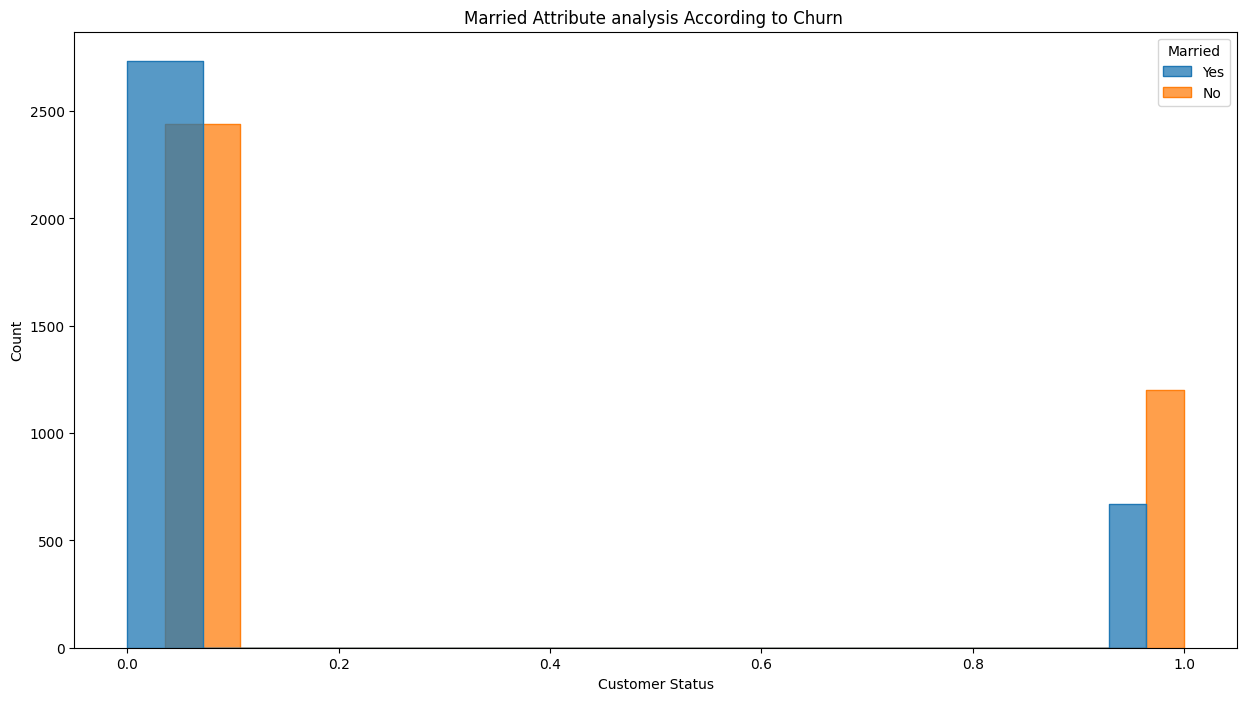

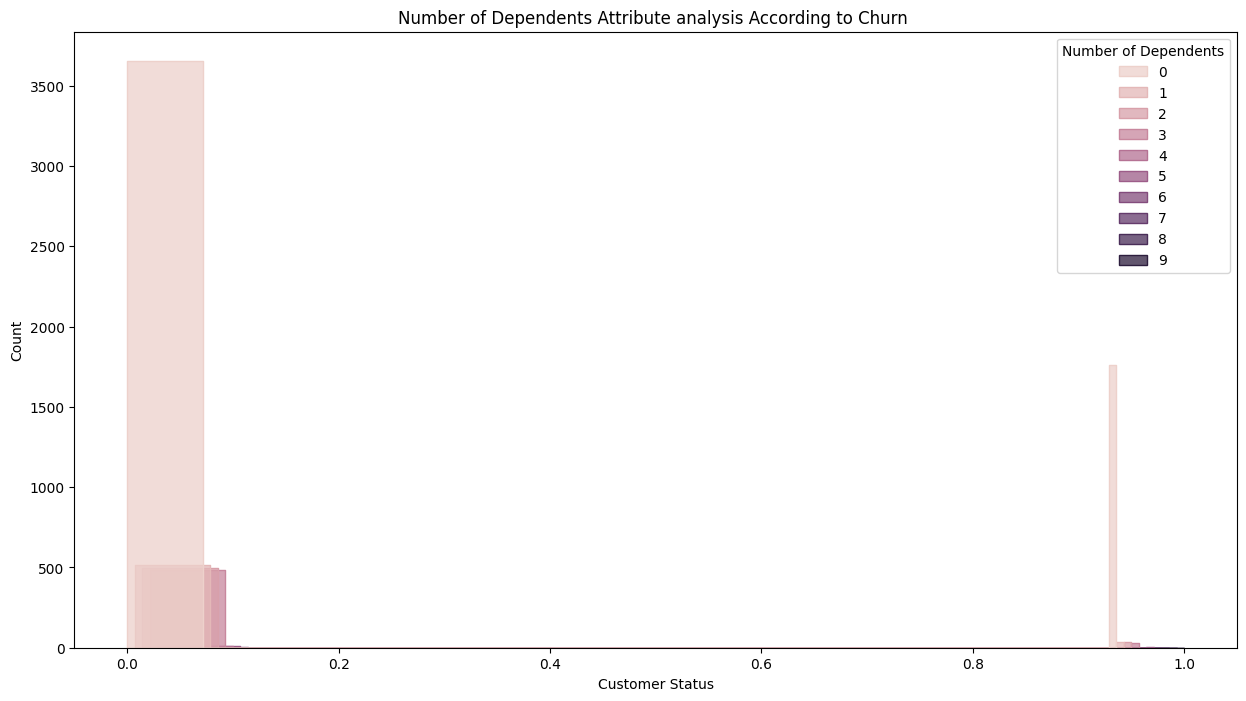

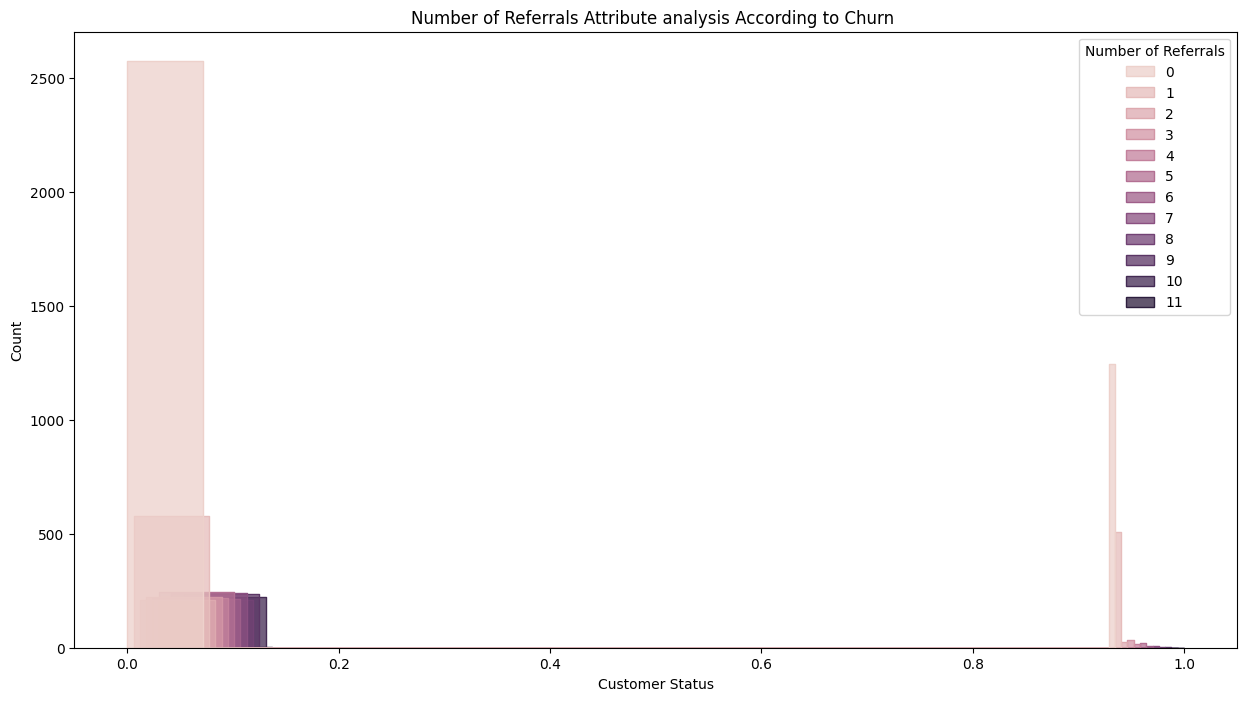

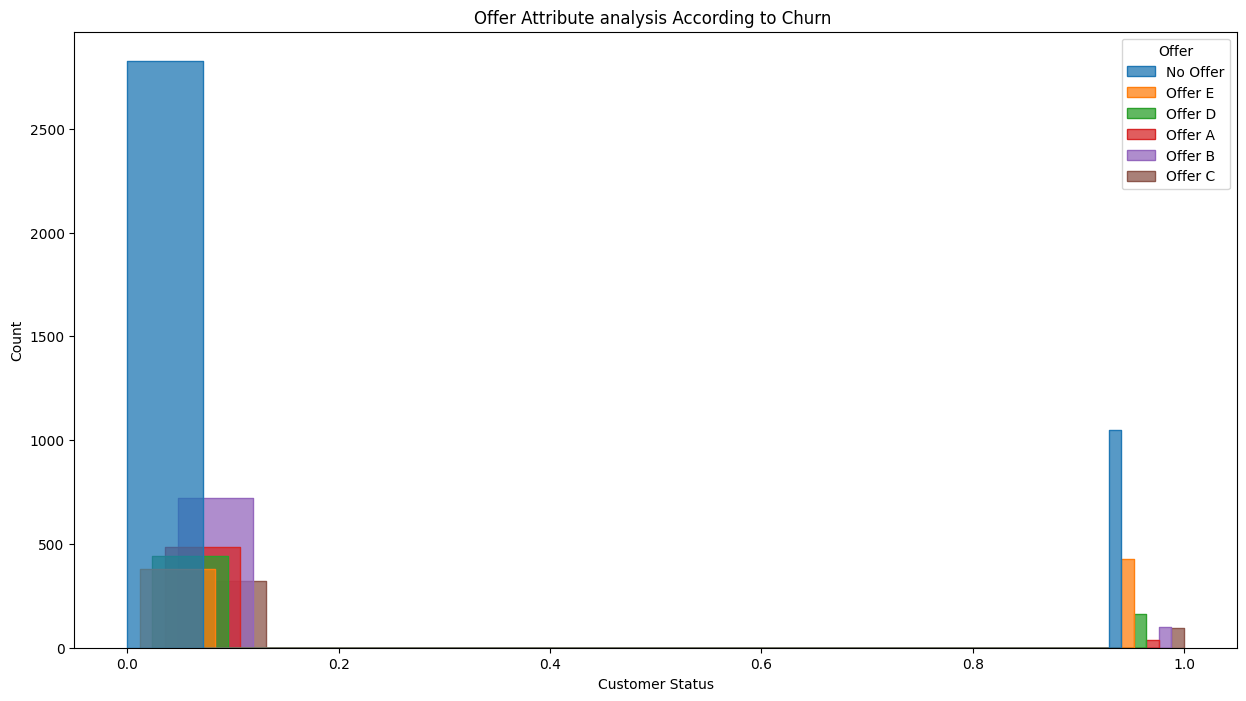

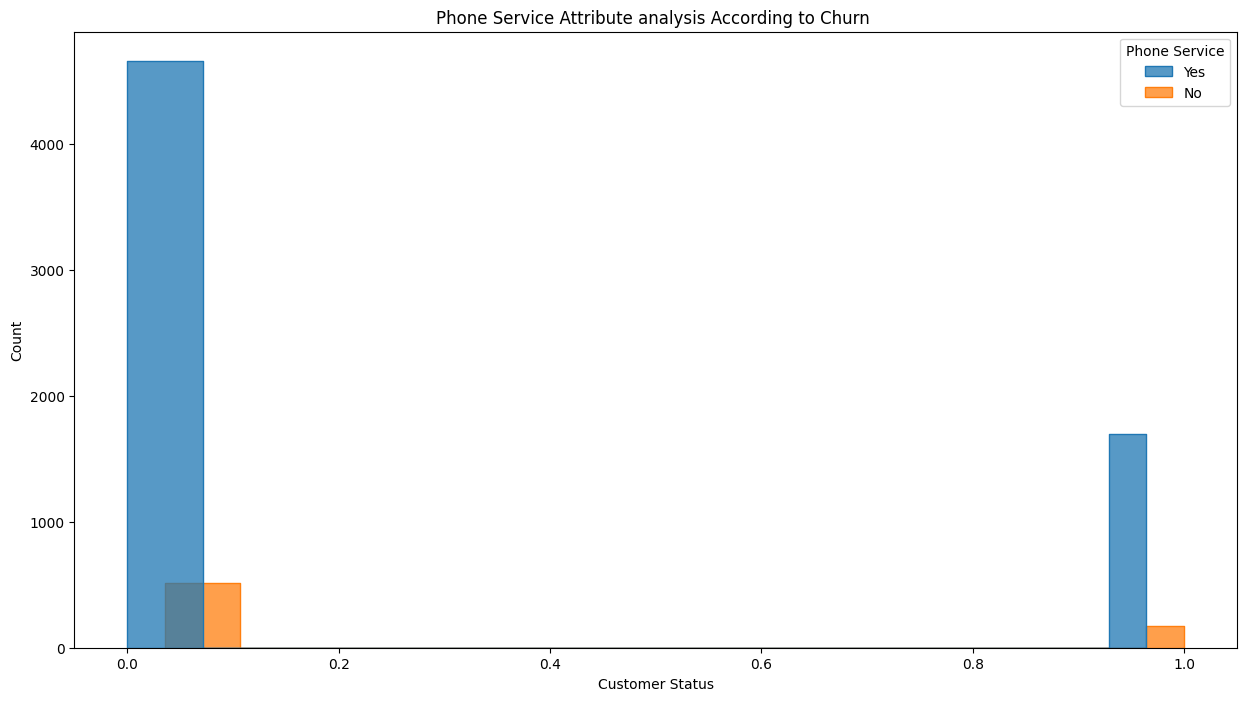

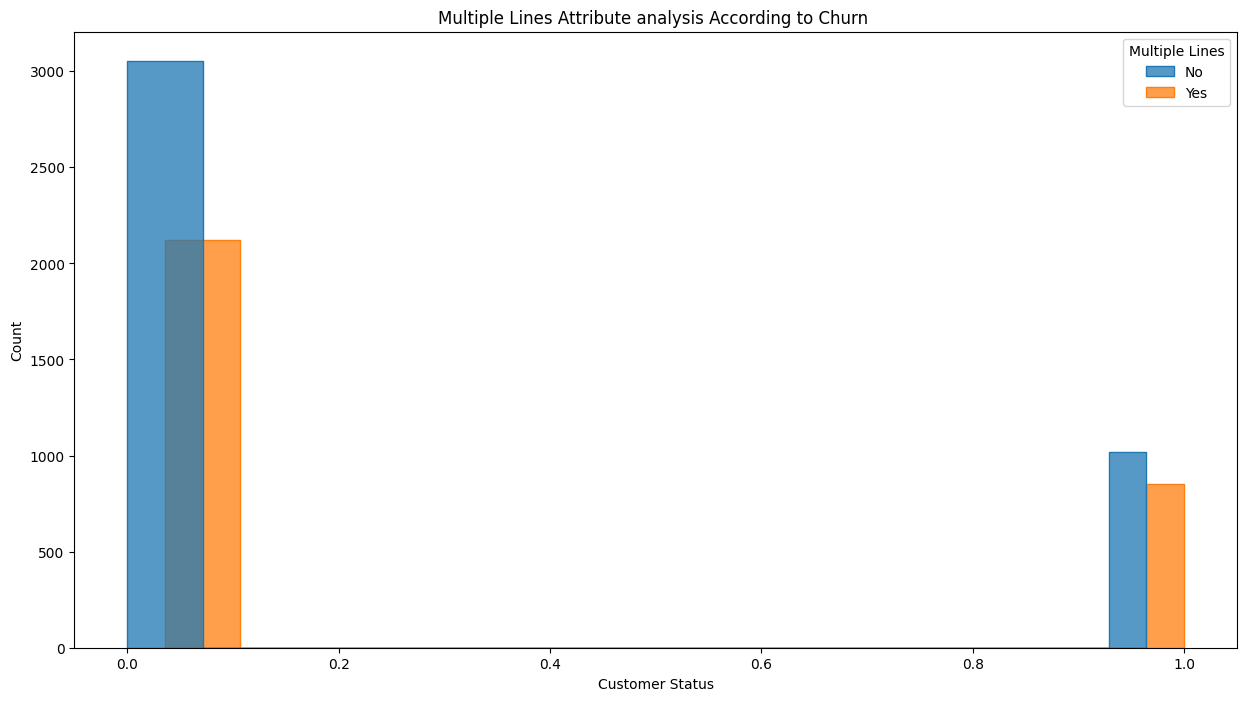

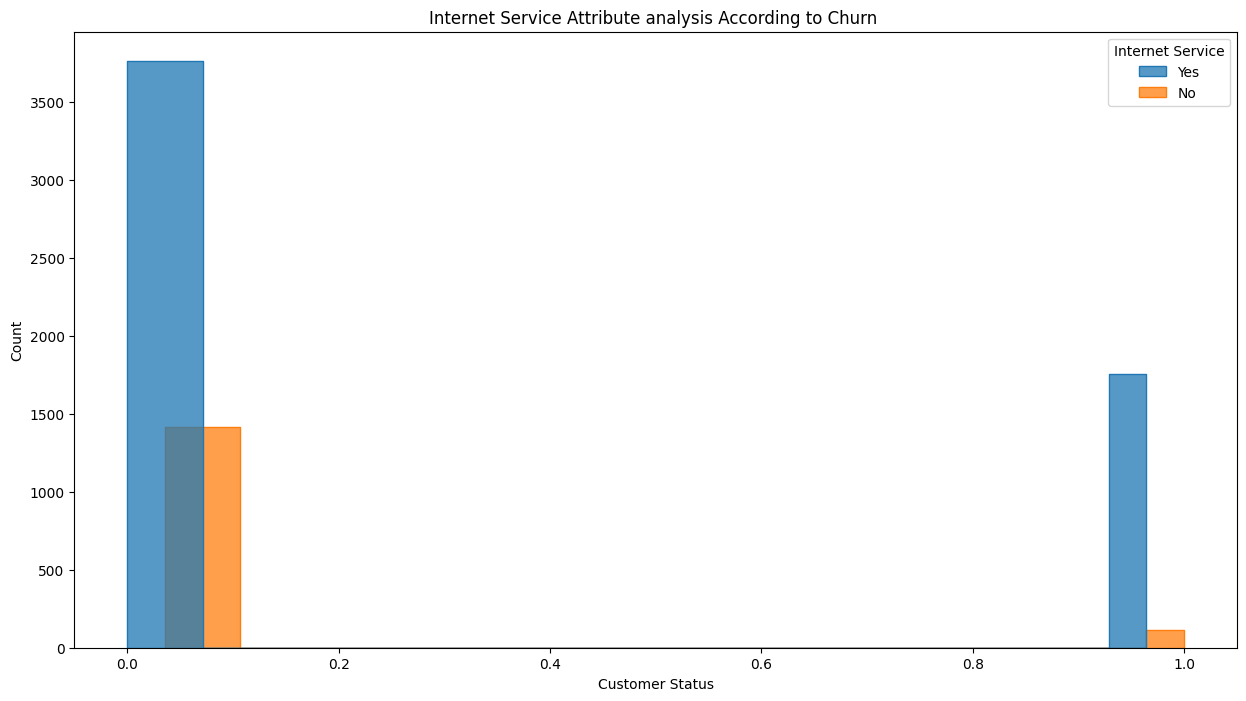

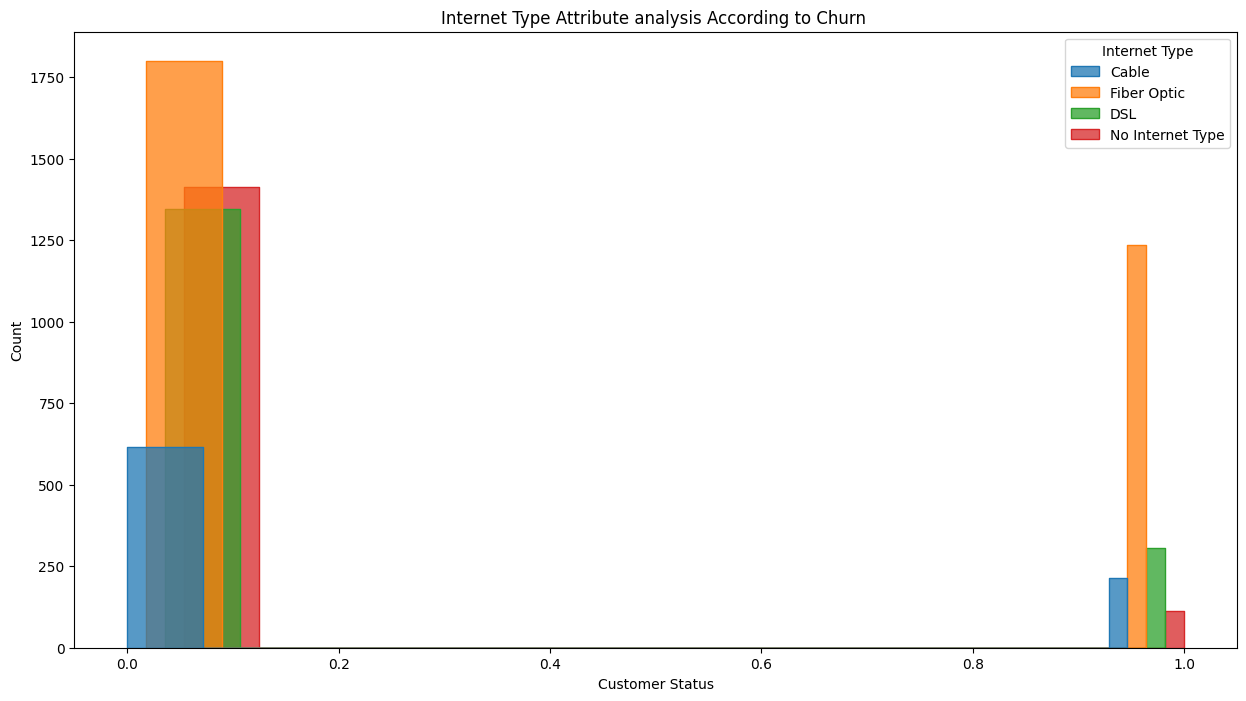

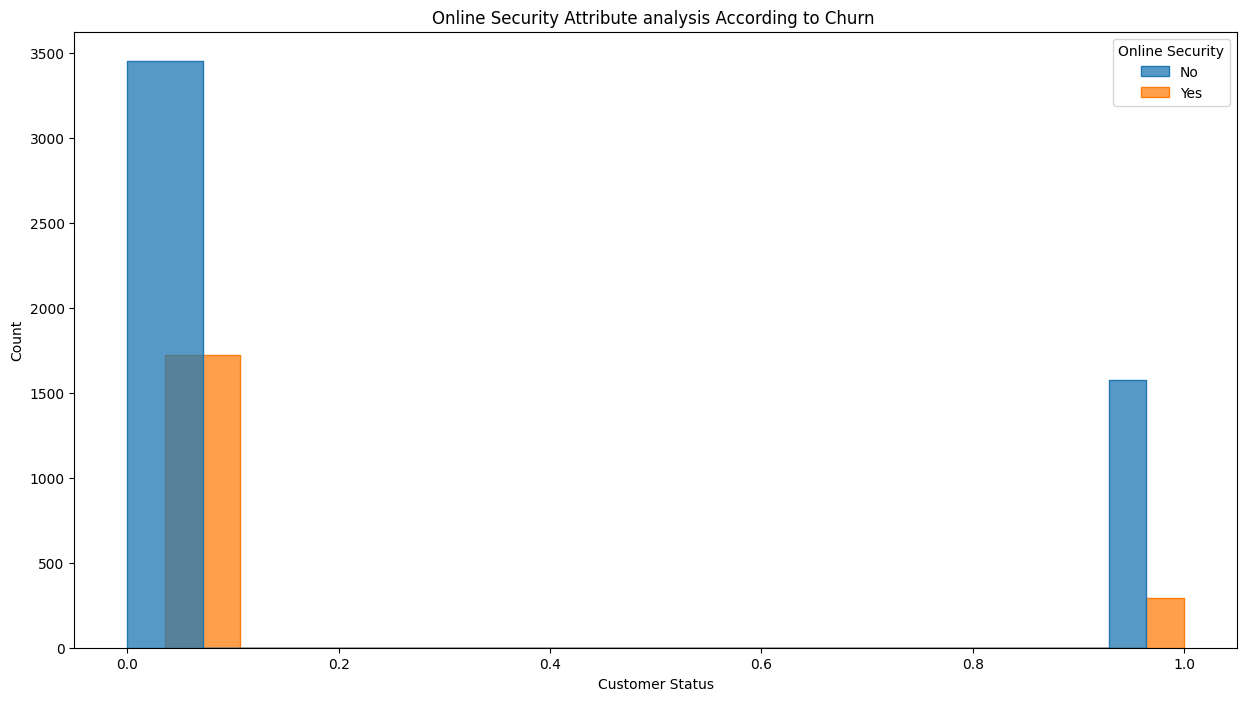

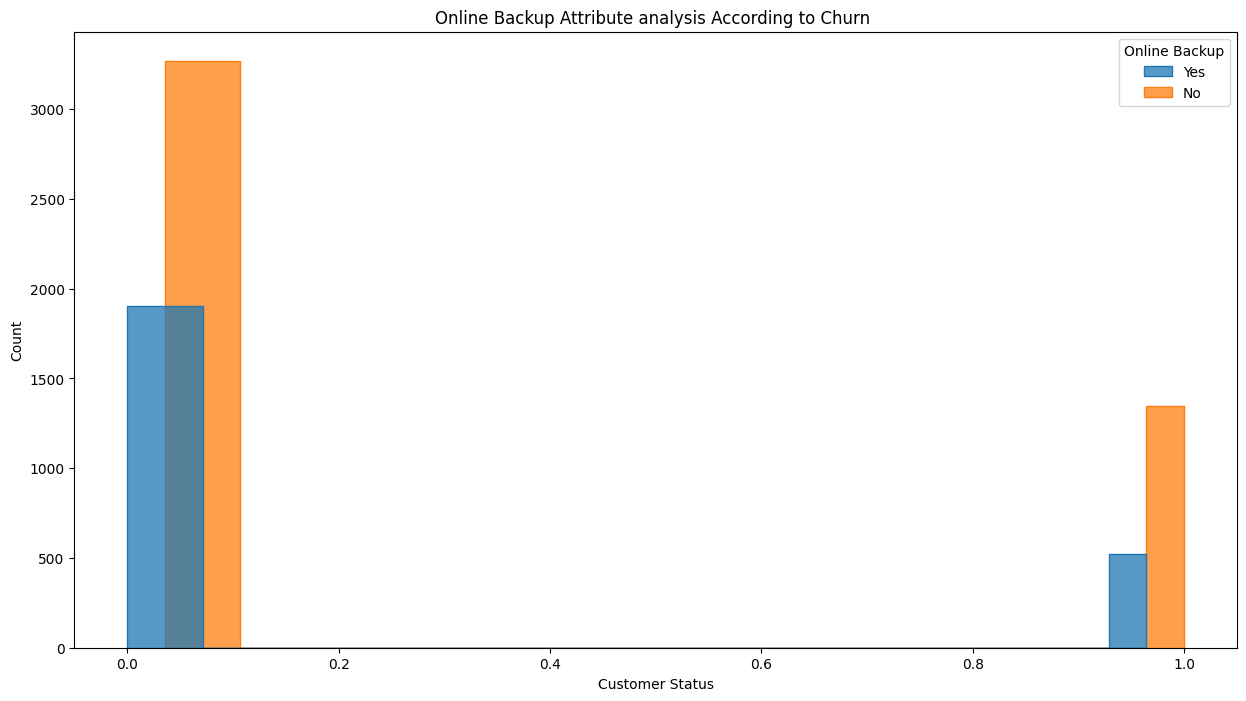

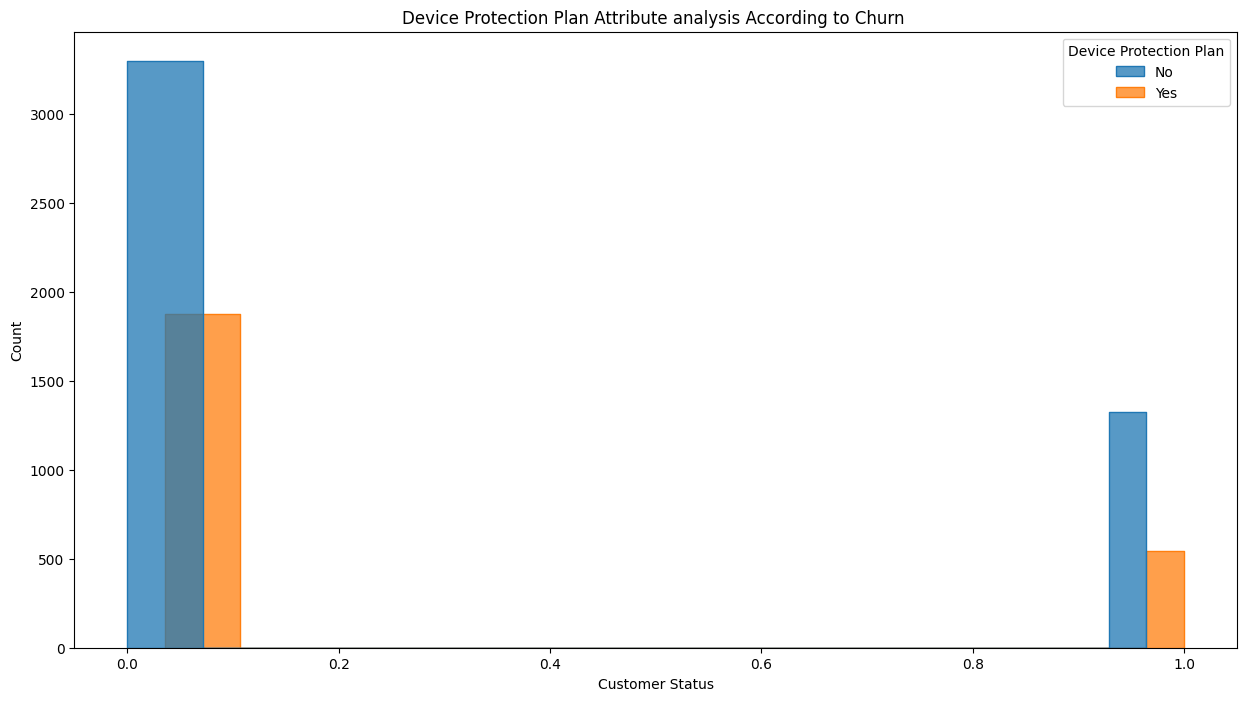

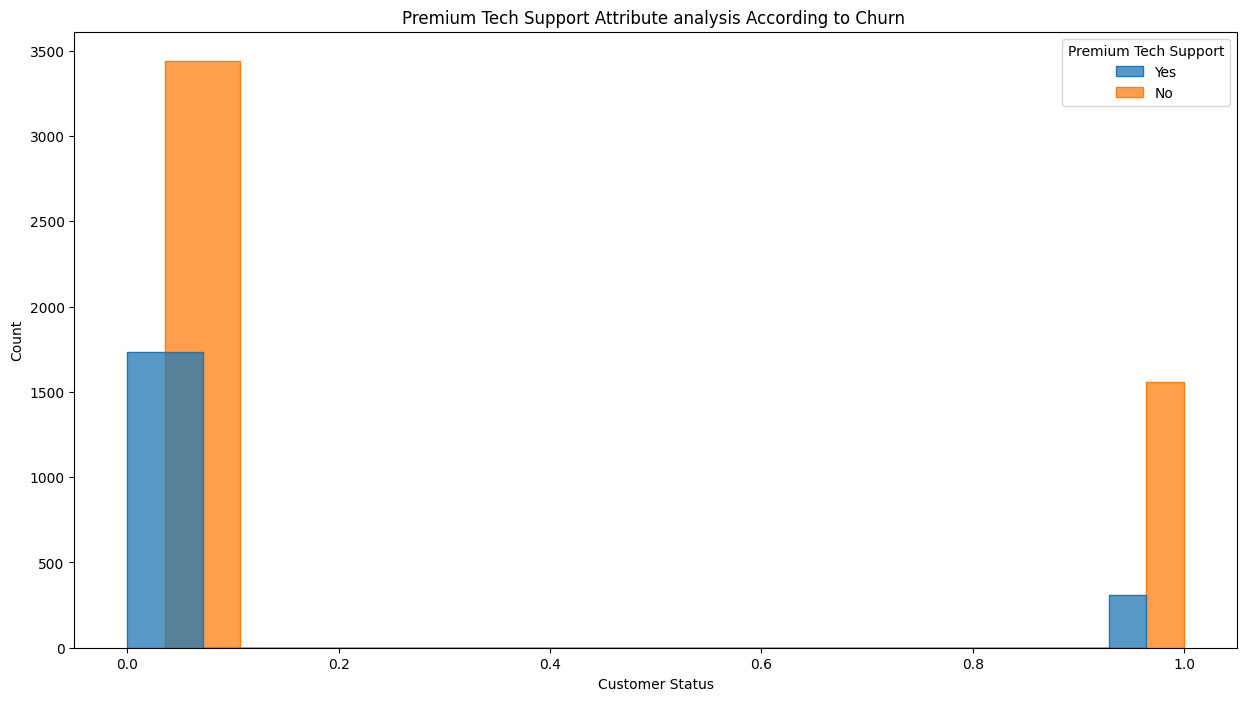

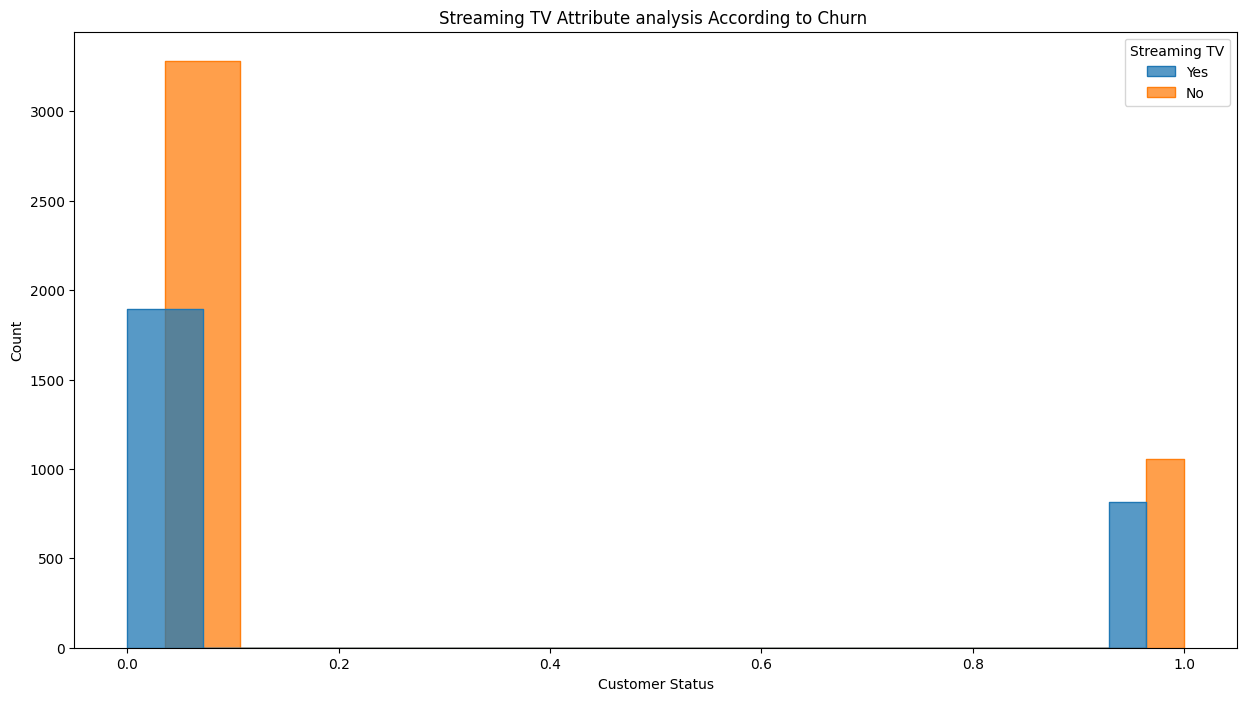

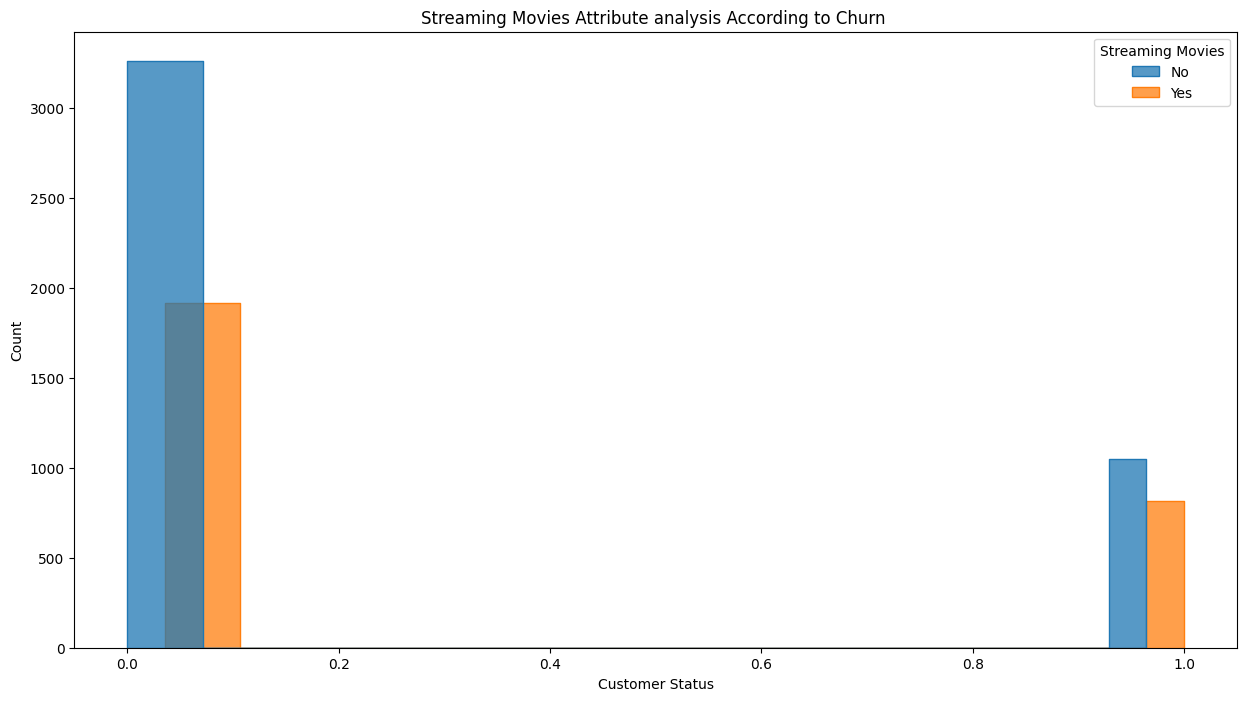

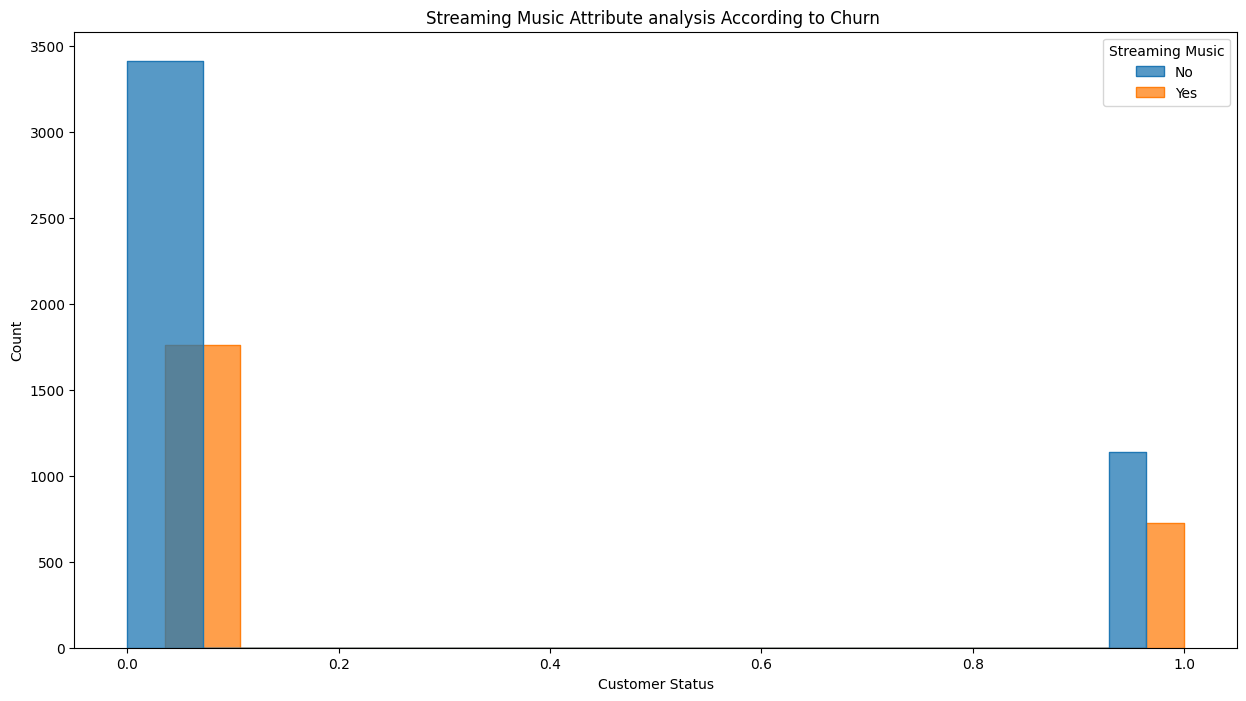

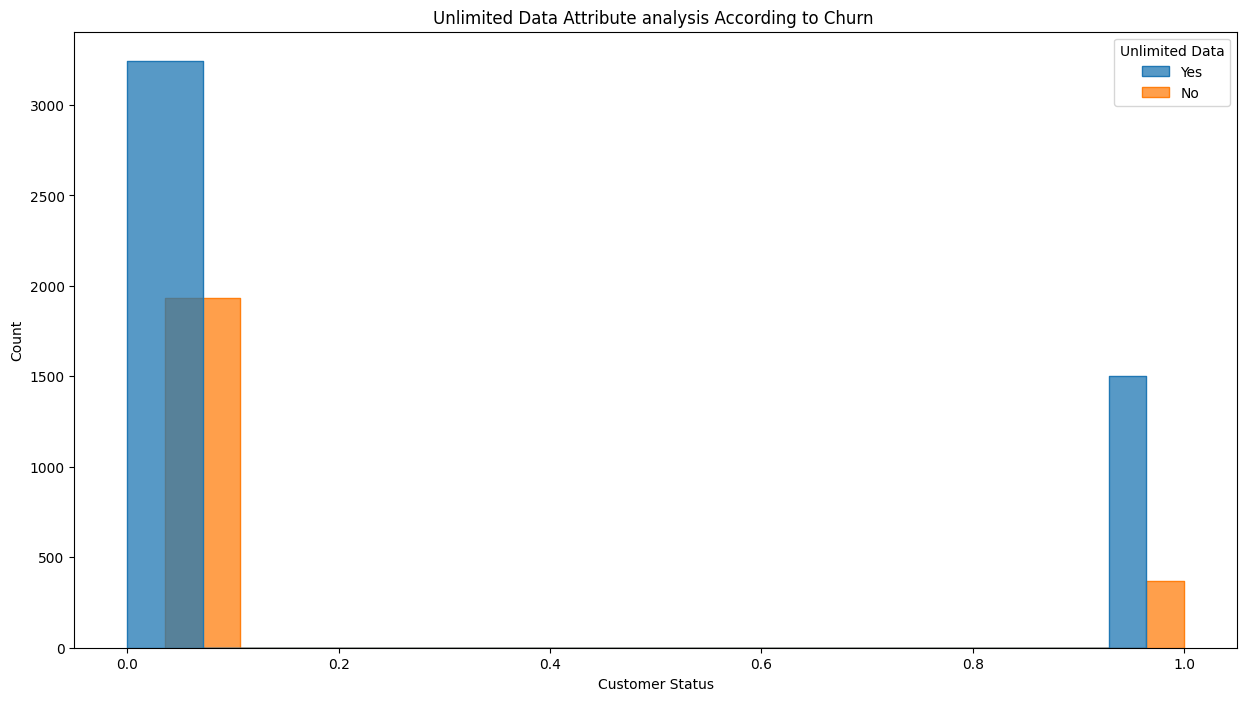

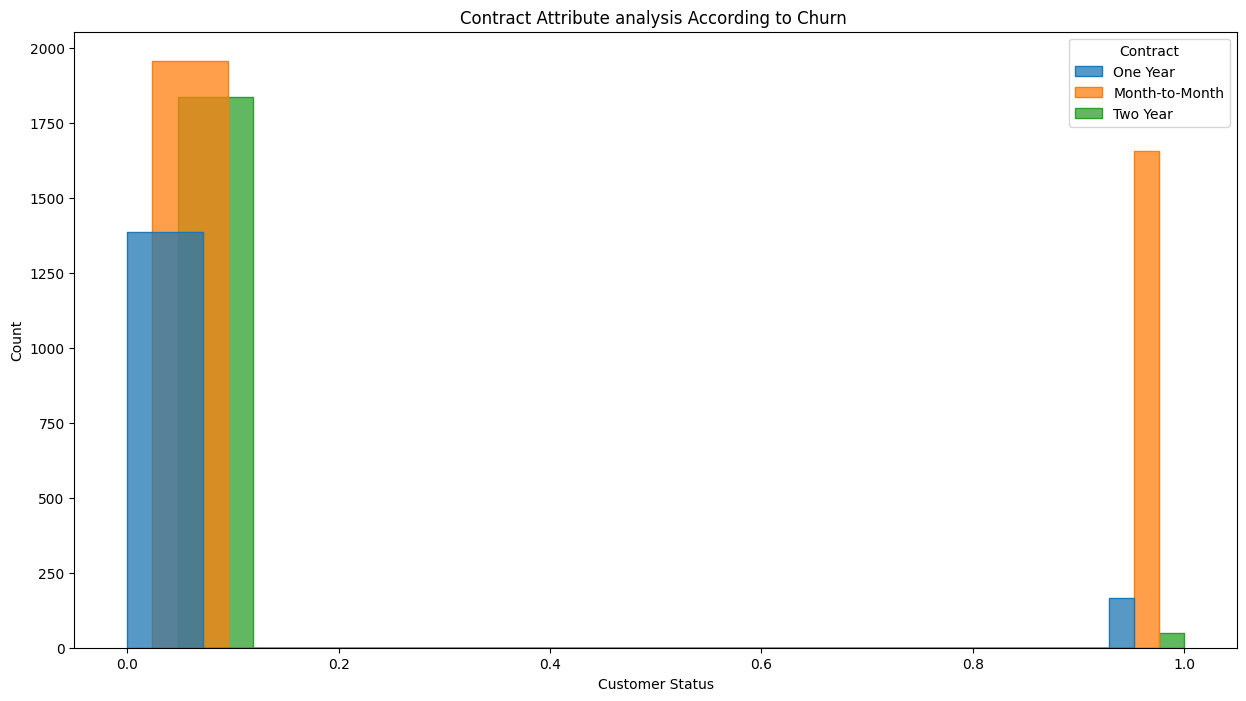

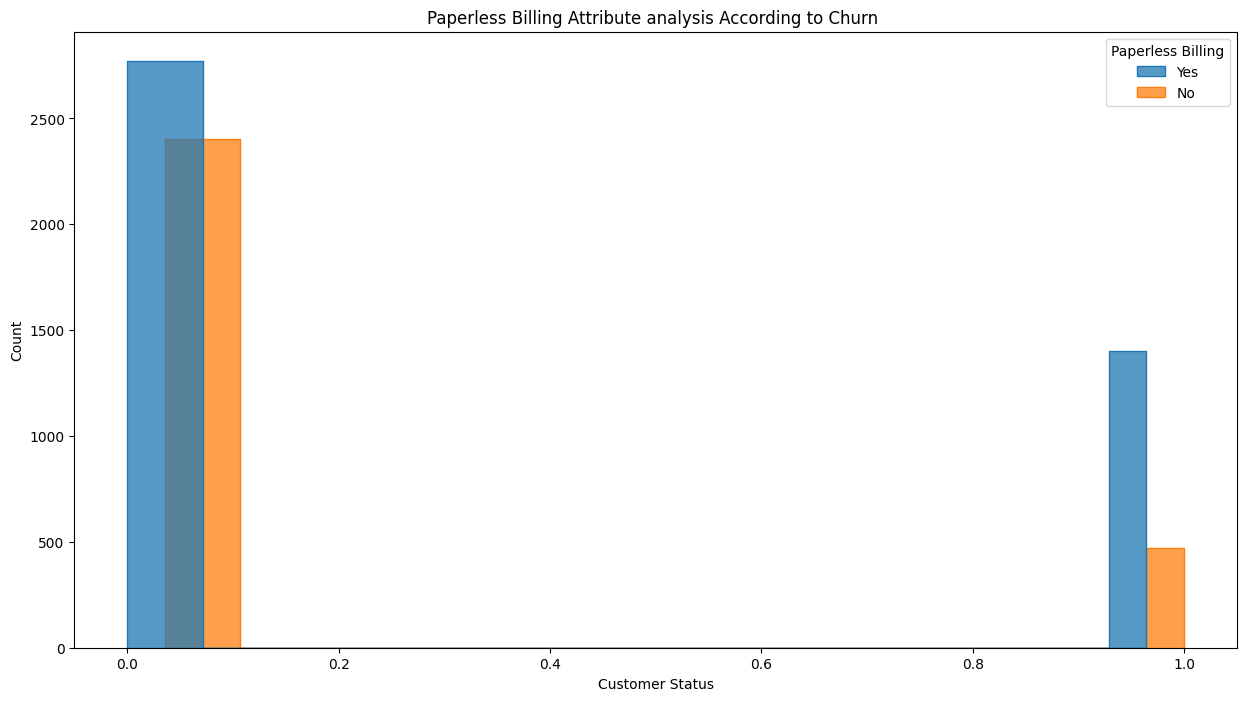

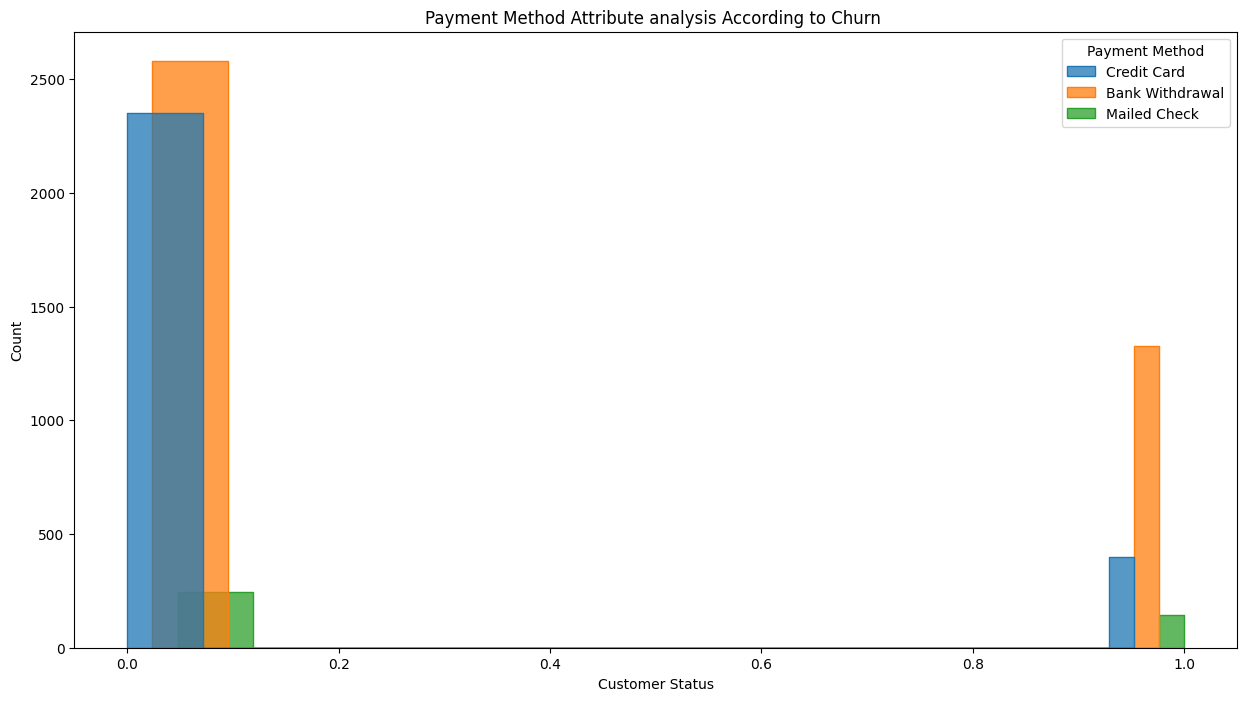

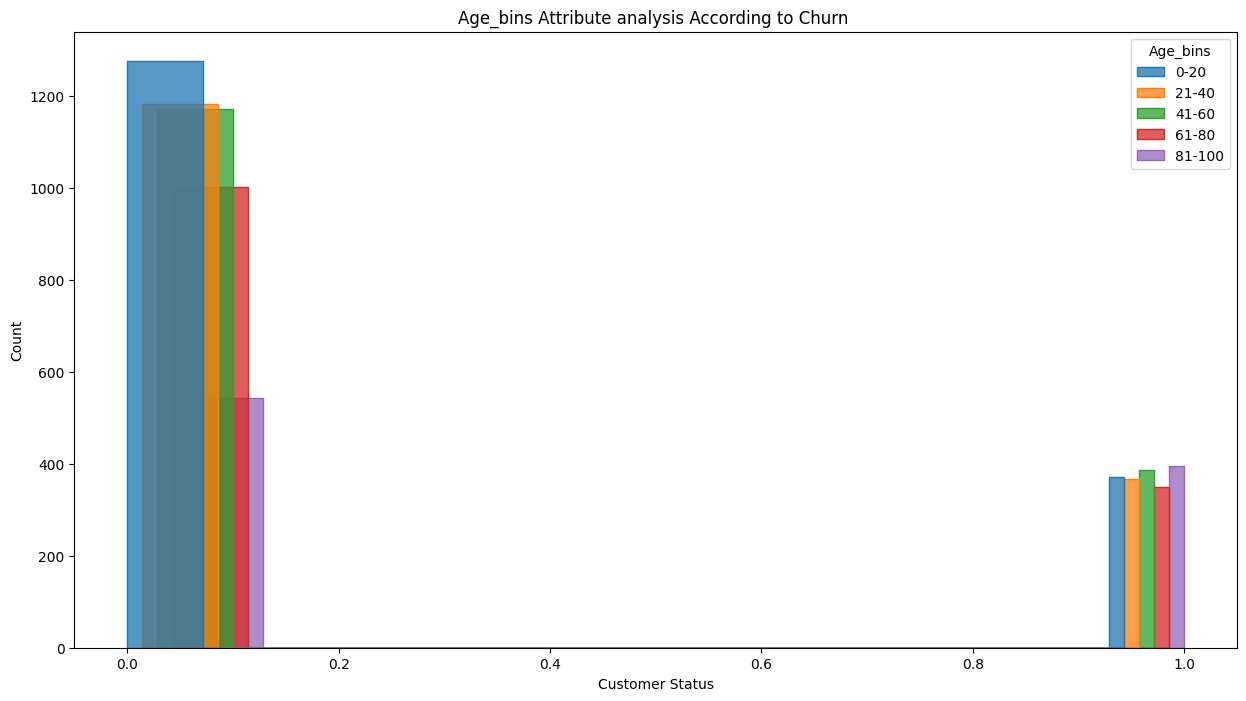

In [15]:
def target_vs_dependent_visual(dataframe, target, column):
    """
      Plotting the Input column with the Target Variable

      Args:
          dataframe : Updated dataframe
          target : Final target column
          column: Input column

    """
    plt.figure(figsize=(15, 8))
    sns.histplot(x=target, hue=column, data=dataframe, element="step", multiple="dodge")
    plt.title(f'{column}'+ " Attribute analysis According to Churn ")
    plt.show()

# Excluding the columns which requires analysis other than numerical, the below list is created to include few of the numerical values as well Ex:  No of Dependents

exclude_cols = ['Age','City','Zip Code','Latitude', 'Longitude', 'Tenure in Months','Avg Monthly Long Distance Charges',
       'Avg Monthly GB Download','Monthly Charge','Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Customer Status','Cancellation Reason','Cancellation Category']
analysis_cols = [col for col in df.columns if col not in exclude_cols]
for col in analysis_cols:
    target_vs_dependent_visual(df, "Customer Status", col)

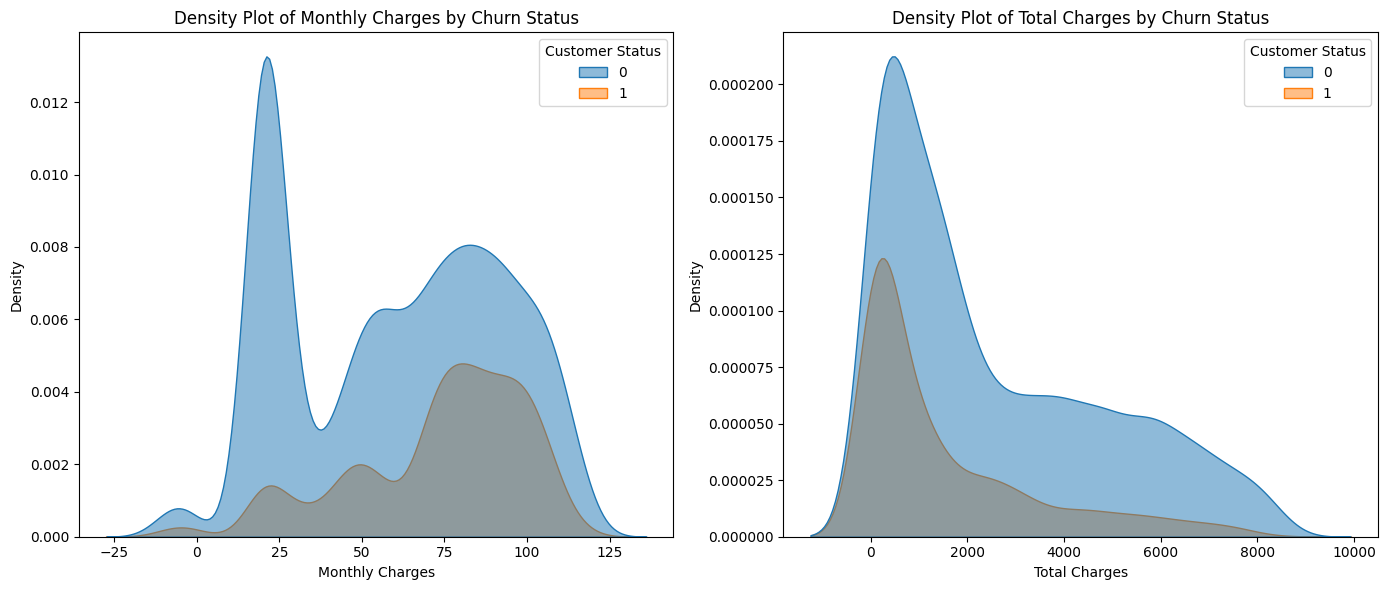

In [16]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Monthly Charges
sns.kdeplot(data=df, x="Monthly Charge", hue="Customer Status", fill=True, alpha=0.5, ax=axes[0])
axes[0].set_title('Density Plot of Monthly Charges by Churn Status')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Density')

# Plot for Total Charges
sns.kdeplot(data=df, x="Total Charges", hue="Customer Status", fill=True, alpha=0.5, ax=axes[1])
axes[1].set_title('Density Plot of Total Charges by Churn Status')
axes[1].set_xlabel('Total Charges')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [17]:
# Exclusing the few numerical columns to better understand the correlation in the input vs target
exclude_cols = ['Age','Zip Code','Latitude', 'Longitude', 'Tenure in Months','Avg Monthly Long Distance Charges',
       'Avg Monthly GB Download', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Cancellation Category']
numerical_analysis_cols = [col for col in df.columns if col not in exclude_cols]

In [18]:


def convert_dependent_variable(data,message):
    """
      #Let's convert the dependent variable to binary variable.

      #First of all, we digitize the target variable, the churn variable, and make it suitable for analysis.
      #Because we will shape all other variables according to their relationship with churn.

      Args:
          data : Updated dataframe
          message : Message for the function call


    """
    print(f'{message}\n')
    gender_mapping = {'Female': 0, 'Male': 1}
    default_mapping = {'No': 0, 'Yes': 1}
    offer_mapping = {'No Offer':6, 'Offer E':5 ,'Offer D':4, 'Offer A':1,'Offer B':2,'Offer C':3}
    internettype_mapping = { 'Cable':1, 'Fiber Optic':2, 'DSL':3, 'No Internet Type':4}
    contract_mapping = {'One Year':1,'Month-to-Month':3,'Two Year':2}
    payment_mapping = {'Credit Card':1, 'Bank Withdrawal':2, 'Mailed Check':3}
    agebins_mapping = {'0-20':1, '21-40':2, '41-60':3, '61-80':4, '81-100':5}
    data['Gender'] = data['Gender'].map(gender_mapping)
    data['Married'] = data['Married'].map(default_mapping)
    data['Offer'] = data['Offer'].map(offer_mapping)
    data['Phone Service'] = data['Phone Service'].map(default_mapping)
    data['Multiple Lines'] = data['Multiple Lines'].map(default_mapping)
    data['Internet Service'] = data['Internet Service'].map(default_mapping)
    data['Internet Type'] = data['Internet Type'].map(internettype_mapping)
    data['Online Security'] = data['Online Security'].map(default_mapping)
    data['Online Backup'] = data['Online Backup'].map(default_mapping)
    data['Device Protection Plan'] = data['Device Protection Plan'].map(default_mapping)
    data['Paperless Billing'] = data['Paperless Billing'].map(default_mapping)
    data['Premium Tech Support'] = data['Premium Tech Support'].map(default_mapping)
    data['Streaming TV'] = data['Streaming TV'].map(default_mapping)
    data['Streaming Movies'] = data['Streaming Movies'].map(default_mapping)
    data['Streaming Music'] = data['Streaming Music'].map(default_mapping)
    data['Unlimited Data'] = data['Unlimited Data'].map(default_mapping)
    data['Contract'] = data['Contract'].map(contract_mapping)
    data['Payment Method'] = data['Payment Method'].map(payment_mapping)
    data['Age_bins'] = data['Age_bins'].map(agebins_mapping)
    print('Encoding the dependent variables completed')


In [19]:
convert_dependent_variable(df,"Encoding the dependent variables started")

Encoding the dependent variables started

Encoding the dependent variables completed


In [20]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
outliers = {}
outlier_counts = {}

for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_counts[col] = len(outliers[col])

# Print the outlier counts
for col, count in outlier_counts.items():
    print(f"Outliers in column '{col}': {count}")

Outliers in column 'Gender': 0
Outliers in column 'Age': 0
Outliers in column 'Married': 0
Outliers in column 'Number of Dependents': 1627
Outliers in column 'Zip Code': 0
Outliers in column 'Latitude': 0
Outliers in column 'Longitude': 0
Outliers in column 'Number of Referrals': 676
Outliers in column 'Tenure in Months': 0
Outliers in column 'Offer': 0
Outliers in column 'Phone Service': 682
Outliers in column 'Avg Monthly Long Distance Charges': 0
Outliers in column 'Multiple Lines': 0
Outliers in column 'Internet Service': 1526
Outliers in column 'Internet Type': 0
Outliers in column 'Avg Monthly GB Download': 362
Outliers in column 'Online Security': 0
Outliers in column 'Online Backup': 0
Outliers in column 'Device Protection Plan': 0
Outliers in column 'Premium Tech Support': 0
Outliers in column 'Streaming TV': 0
Outliers in column 'Streaming Movies': 0
Outliers in column 'Streaming Music': 0
Outliers in column 'Unlimited Data': 0
Outliers in column 'Contract': 0
Outliers in col

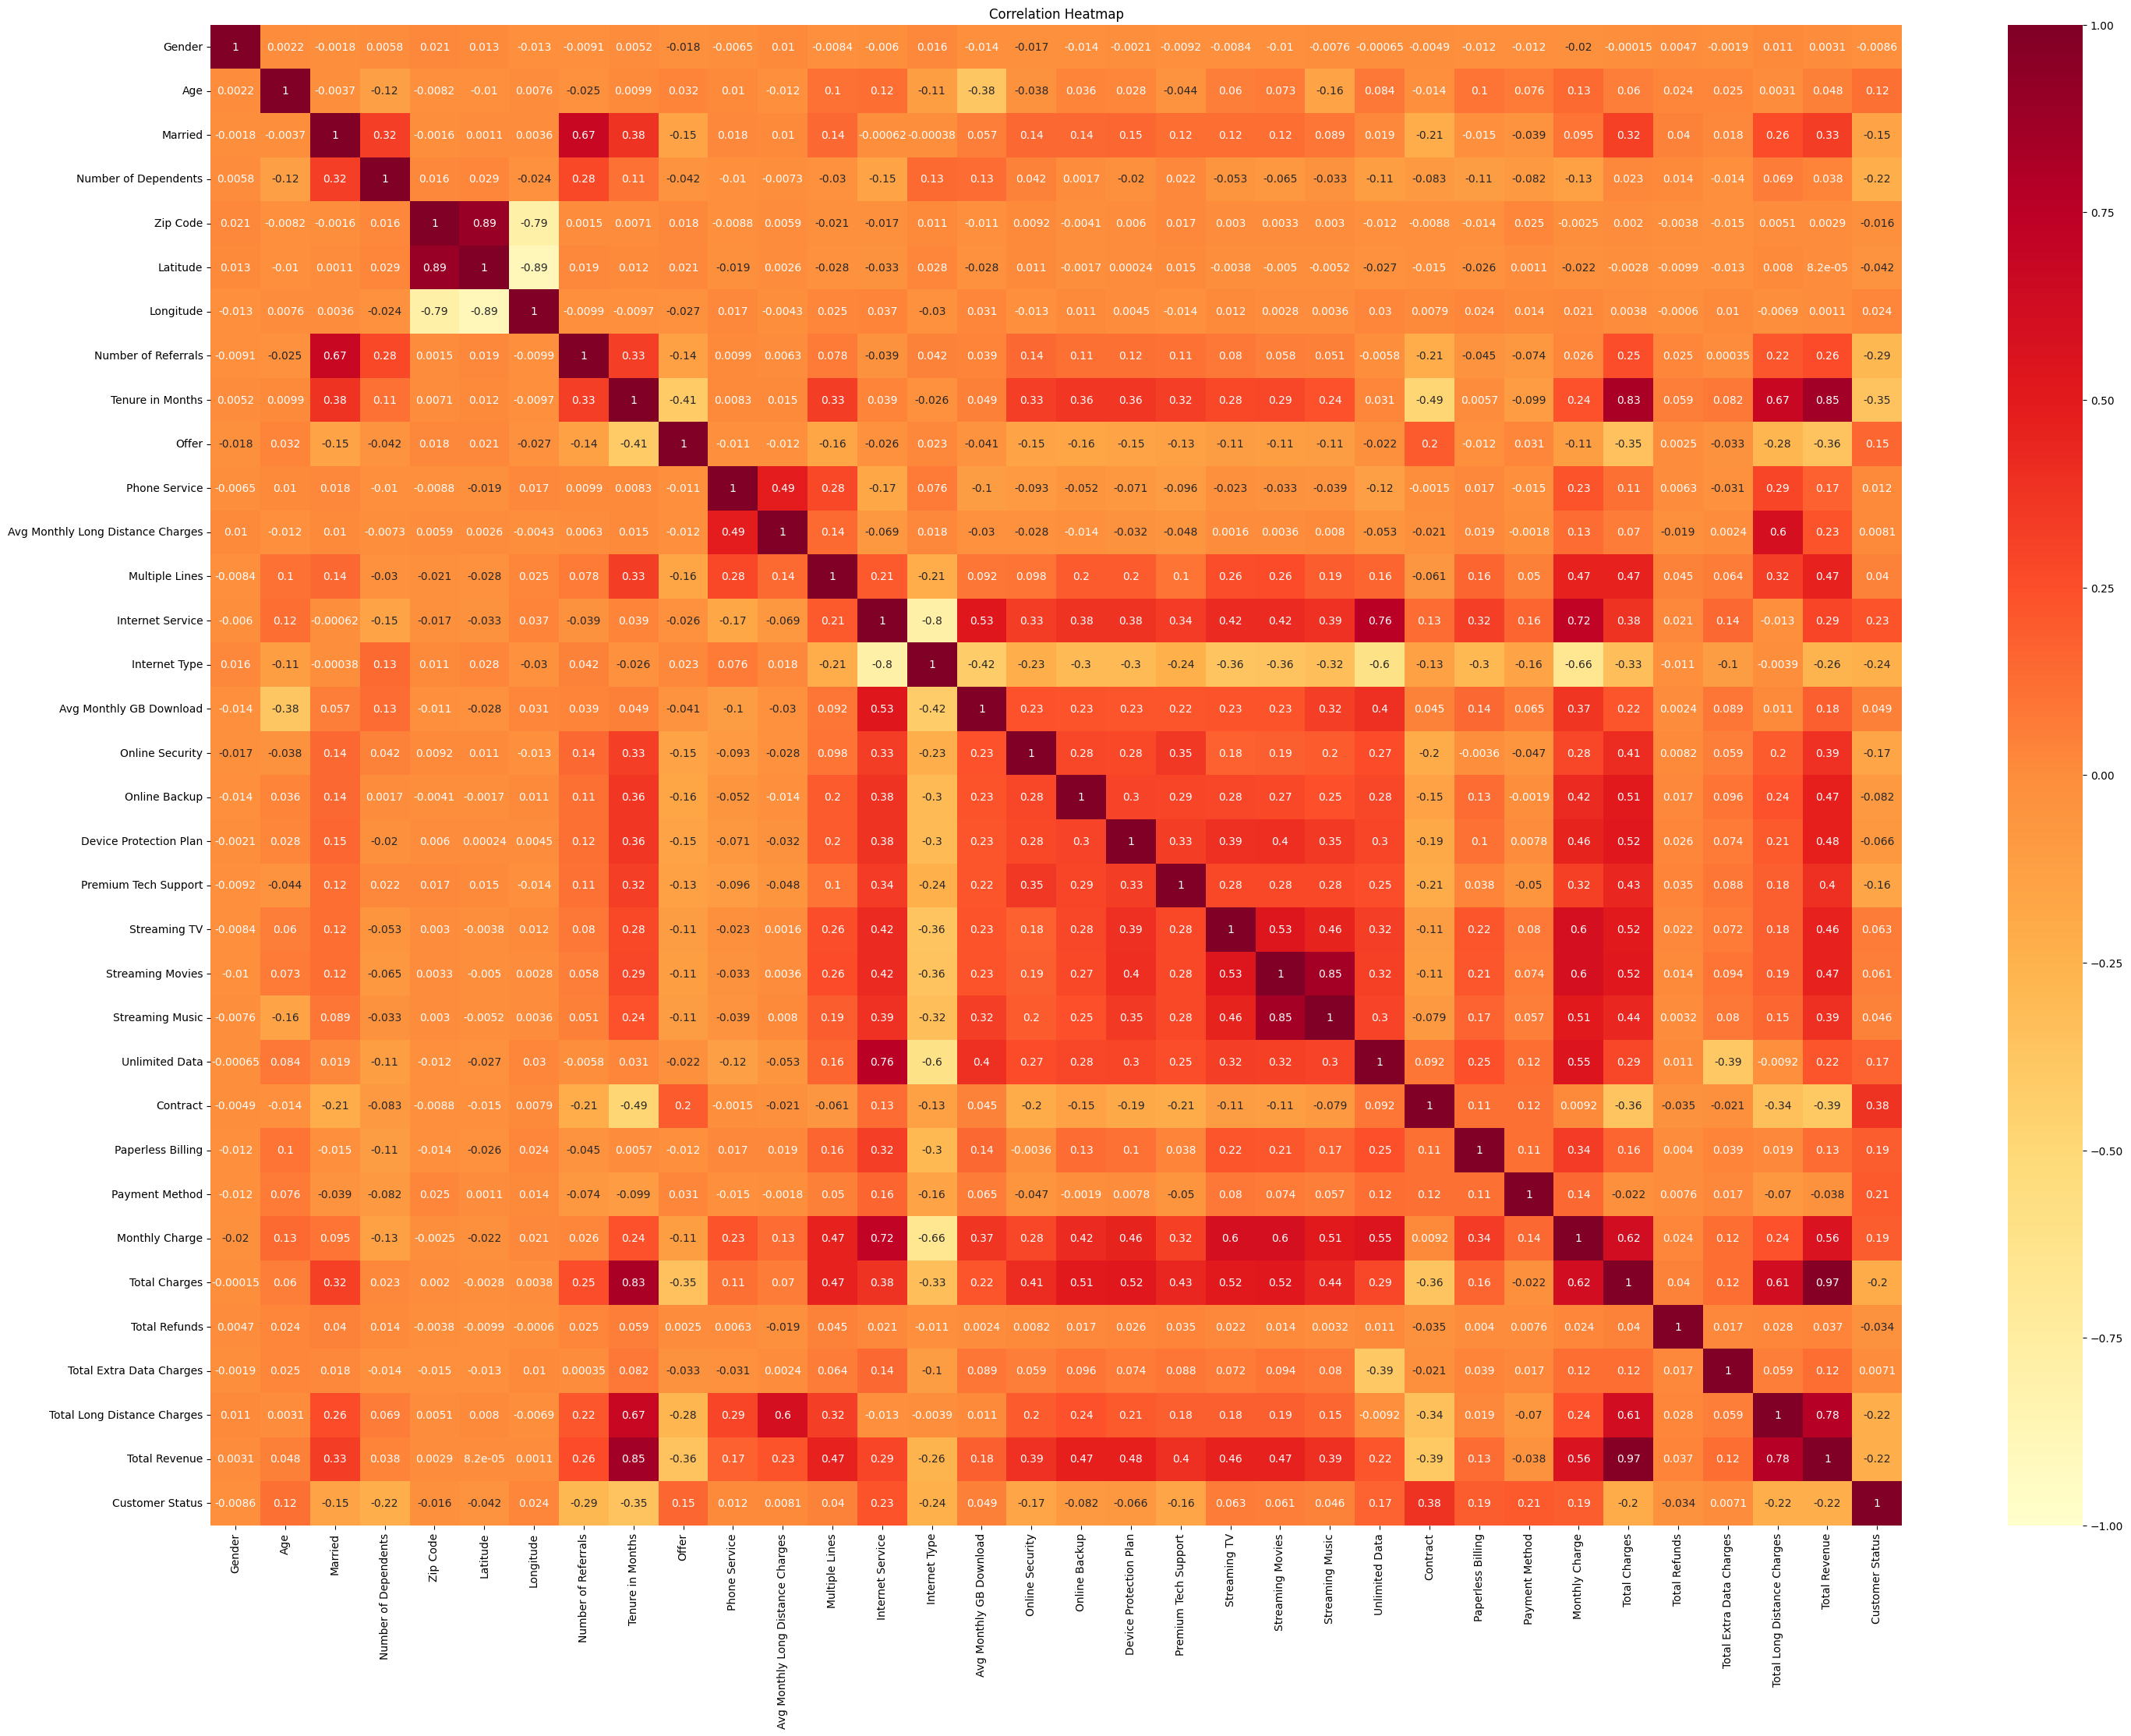

In [21]:
# Create a correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(35, 25))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [22]:
# Identify highly correlated features
high_corr_pairs = []
for i in range(len(numerical_cols)):
    for j in range(i+1, len(numerical_cols)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((numerical_cols[i], numerical_cols[j], corr_matrix.iloc[i, j]))
logger.info(high_corr_pairs)

2024-07-03 19:47:21,889 - __main__ - INFO - [('Zip Code', 'Latitude', 0.8947688809409318), ('Latitude', 'Longitude', -0.8859792467565488), ('Tenure in Months', 'Total Charges', 0.8260735088595952), ('Tenure in Months', 'Total Revenue', 0.8531462752059238), ('Streaming Movies', 'Streaming Music', 0.8485281327010227), ('Total Charges', 'Total Revenue', 0.972212108028604)]
INFO:__main__:[('Zip Code', 'Latitude', 0.8947688809409318), ('Latitude', 'Longitude', -0.8859792467565488), ('Tenure in Months', 'Total Charges', 0.8260735088595952), ('Tenure in Months', 'Total Revenue', 0.8531462752059238), ('Streaming Movies', 'Streaming Music', 0.8485281327010227), ('Total Charges', 'Total Revenue', 0.972212108028604)]


In [23]:
def correlation(data,threshold):
    col_corr = set()
    high_corr_pairs = []
    for i in range(len(numerical_cols)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname = corr_matrix.columns[i]
                high_corr_pairs.append((numerical_cols[i], numerical_cols[j], corr_matrix.iloc[i, j]))
                col_corr.add(colname)
    logger.info("Highly Correlated Pairs",high_corr_pairs)
    return col_corr

In [24]:
corr_features = correlation(df,0.8)
logger.info("Correlated features",corr_features)

--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/usr/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/usr/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    a

In [25]:
#Check Any features are correlated to Target with 0.4 thresholds
target_col = 'Customer Status'
threshold = 0.4  # Adjust the threshold value
high_corr_features = corr_matrix[target_col].abs()[corr_matrix[target_col].abs() > threshold].sort_values(ascending=False)

logger.info("Features with correlation to target above the 0.4 threshold")
logger.info(high_corr_features)

logger.info(f'Exploratory Data Analysis Completed')

2024-07-03 19:47:22,126 - __main__ - INFO - Features with correlation to target above the 0.4 threshold
INFO:__main__:Features with correlation to target above the 0.4 threshold
2024-07-03 19:47:22,160 - __main__ - INFO - Customer Status    1.0
Name: Customer Status, dtype: float64
INFO:__main__:Customer Status    1.0
Name: Customer Status, dtype: float64
2024-07-03 19:47:22,166 - __main__ - INFO - Exploratory Data Analysis Completed
INFO:__main__:Exploratory Data Analysis Completed


## Based on the above analysis dropping few features in feature Engineering

* Customer ID   - Churn rate is not dependent on the Customer ID
* Gender - There is a small gap between male and female churn, female is more likely to chrun.
*  Age     - After binning, Customers with 81-100 and 41-60 are more likely to churn compare to other ages
* Married- Unmarried are more likely to churn
* Number of Dependents- Zero dependents are more likely to churn( Large difference when compared with dependents - more outliers
* City-based on the data city has clear relationship with Zip code, we can eliminate this
* Zip Code - based on the zip code there is a slight change in the churn and no churn ratio
* Latitude - Since the latitude is dependent on the Zip code and City , we can eliminate
* Longitude -  Since the Longitude is dependent on the Zip code and City , we can eliminate
* Number of Referrals - 0 and 1 referals are more likely to churn when compared to more refferals - more outliers
* Tenure in Months - Tenure in months is directly related to the Contract, We can eliminate
* Offer - Customers with No offer are more likely to Churn compared to offers
* Phone Service - Customers with Phone service are more likely to churn that the no phone service - more outliers
* Avg Monthly Long Distance Charges - Since there is a total charges data and more outliers
* Multiple Lines - Customers with Single line are more likely to churn
* Internet Service - Customers with internet service are more likely to churn that the no phone service - more outliers
* Internet Type - Customers with Fiber Optic Internet type are more likely to churn.
* Avg Monthly GB Download-more outliers
* Online Security -  Customers with No Online Security are more likely to Churn
* Online Backup  - Customers with No Online Backup are more likely to Churn
* Device Protection Plan -  Customers with No Devive Protection Plan are more likely to Churn
* Premium Tech Support - Customers with No Premium Tech Support are more likely to Churn
* Streaming TV  - Customers with No Streaming TV are more likely to Churn
* Streaming Movies  - Customers with No Streaming Movies are more likely to Churn
* Streaming Music- Customers with No Streaming Music are more likely to Churn, also there exists a correlation.
Unlimited Data    -  Customers with No Unlimited Data are more likely to Churn
* Contract -      Month to Month are more likely to Churn                      
* Paperless Billing  - Customer with Yes Paperless Billing are more likely to churn               
* Payment Method  - Bank withdrawl are more likely to churn  
             
* Monthly Charge  - Less monthly charges are more likely to retain but 60-100 are bit different               
* Total Charges-Less total charges are more likely to retain , according to the correlation matrix since it is positively correlated                 
* Total Refunds-more outliers             
* Total Extra Data Charges-more outliers
* Total Long Distance Charges--more outliers
* Total Revenue-outliers exists, there exists a positive correlation              
* Customer Status - Target Column               
* Cancellation Category--based on the business idea, category has more empty values and not usefull for model      
* Cancellation Reason-based on the business idea, Reason has more empty values and not usefull for model





## Feature engineering

In [26]:
logger.info(f'Feature Engineering started')

# we will drop the feature bassed on the previous analysis

drop_columns = ['Number of Dependents', 'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months',
       'Phone Service', 'Avg Monthly Long Distance Charges',
       'Internet Service', 'Avg Monthly GB Download',  'Streaming Music',
       'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Cancellation Category']
df = df.drop(drop_columns, axis=1)

2024-07-03 19:47:22,178 - __main__ - INFO - Feature Engineering started
INFO:__main__:Feature Engineering started


In [27]:

logger.info(f'split data into X and y started')
X = df.drop('Customer Status', axis=1)
y = df['Customer Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

logger.info(f'split data into X and y completed')
logger.info(f'Feature Engineering completed')

2024-07-03 19:47:22,203 - __main__ - INFO - split data into X and y started
INFO:__main__:split data into X and y started
2024-07-03 19:47:22,240 - __main__ - INFO - split data into X and y completed
INFO:__main__:split data into X and y completed
2024-07-03 19:47:22,257 - __main__ - INFO - Feature Engineering completed
INFO:__main__:Feature Engineering completed


## Modeling

# Logistic Regression
###### **Desccription:** Statistical Model for Binary Classification Tasks, Outputting Probability Values.
###### **Usage:** Healthcare (Disease Prediction), Marketing (Customer Churn Analysis)

# K-Nearest Neighbors
###### **Desccription:**Simple Algorithm Classifying Objects Based on Majority Class of Their K-Nearest Neighbors.
######**Usage:**  Classification and Regression Tasks Where Instances Are Close in Feature Space.

# Naive Bayes
###### **Desccription:**Probabilistic Classifier Based on Bayes' Theorem with Independence Between Features Assumed.
###### **Usage:**  Text Classification, Spam Filtering, Recommendation Systems.

# Support Vector Machine
###### **Desccription:**Powerful Algorithm Finding Optimal Hyperplane to Separate Classes.
###### **Usage:** Image Recognition, Text Classification, Bioinformatics.

# Decision Tree
###### **Desccription:**Recursively Partitions Data Based on Features to Make Decisions in a Tree-Like Structure.
###### **Usage:** Predictive Modeling, Classification.

# Random Forest
###### **Desccription:**Ensemble Learning Method Aggregating Predictions of Multiple Decision Trees.
###### **Usage:** Finance, Healthcare, Large Datasets, High-Dimensional Feature Spaces.



In [28]:
logger.info(f'Model Training Testing  started')

# Initialize an empty list to store model scores
model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__max_depth': [None, 10, 20]}),  # Add hyperparameters for Random Forest

    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__penalty': ['l1', 'l2']}),  # Add hyperparameters for Logistic Regression
    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'model__n_neighbors': [3, 5, 7],
         'model__weights': ['uniform', 'distance']}),  # Add hyperparameters for KNN
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'model__max_depth': [None, 10, 20],
         'model__min_samples_split': [2, 5, 10]}),  # Add hyperparameters for Decision Tree
    ('Naive Bayes', GaussianNB(), {})  # No hyperparameters for Naive Bayes
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=2)
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)
    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", accuracy.round(3),"%")
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the overall best model

print(f"Test Accuracy:", {best_accuracy})
print(f"Model Pipeline:", {best_model}, "with accuracy", {best_accuracy.round(2)}, "%")
logger.info(f'Model Training Testing  completed')

2024-07-03 19:47:22,318 - __main__ - INFO - Model Training Testing  started
INFO:__main__:Model Training Testing  started


Model: Random Forest
Test Accuracy: 0.816 %



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


6 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  

Model: Logistic Regression
Test Accuracy: 0.743 %

Model: K-Nearest Neighbors
Test Accuracy: 0.764 %



2024-07-03 19:47:38,495 - __main__ - INFO - Model Training Testing  completed
INFO:__main__:Model Training Testing  completed


Model: Decision Tree
Test Accuracy: 0.784 %

Model: Naive Bayes
Test Accuracy: 0.781 %

Test Accuracy: {0.8161816891412349}
Model Pipeline: {Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=10, n_estimators=200,
                                        random_state=42))])} with accuracy {0.82} %


2024-07-03 19:47:38,516 - __main__ - INFO - plotting the Models Scores Started
INFO:__main__:plotting the Models Scores Started
<ipython-input-29-f3b82f990864>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




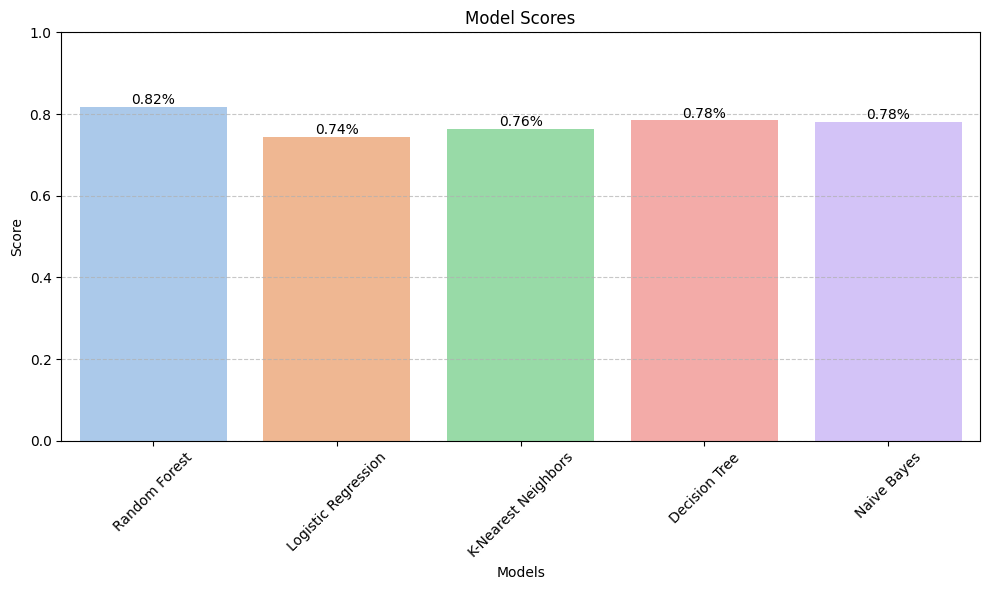

2024-07-03 19:47:39,065 - __main__ - INFO - plotting the Models Scores Completed
INFO:__main__:plotting the Models Scores Completed


In [29]:
logger.info(f'plotting the Models Scores Started')

# Define a color palette for the bars
colors = sns.color_palette('pastel', n_colors=len(scores_df))

# Create a bar plot of models and their scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=scores_df, palette=colors)

# Add text on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Model Scores')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

logger.info(f'plotting the Models Scores Completed')

2024-07-03 19:47:39,087 - __main__ - INFO - Plotting the Training and Testing data Confusion Matrix Started
INFO:__main__:Plotting the Training and Testing data Confusion Matrix Started


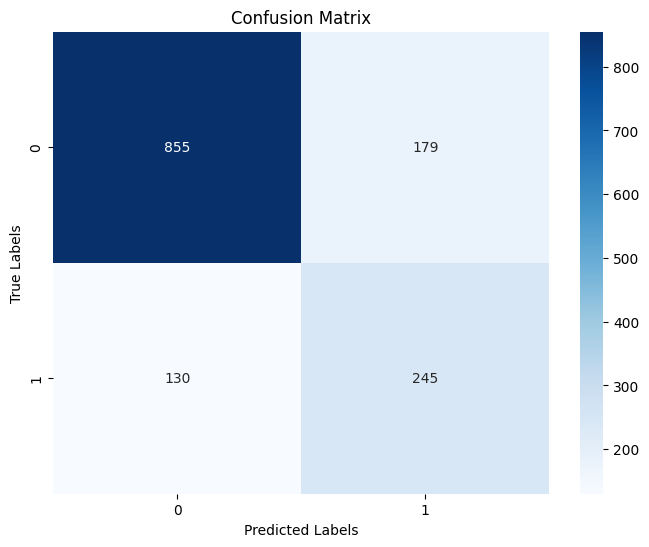

2024-07-03 19:47:39,483 - __main__ - INFO - Plotting the Training and Testing data Confusion Matrix Completed
INFO:__main__:Plotting the Training and Testing data Confusion Matrix Completed


In [30]:

logger.info(f'Plotting the Training and Testing data Confusion Matrix Started')
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

logger.info(f'Plotting the Training and Testing data Confusion Matrix Completed')

## Validation

2024-07-03 19:47:39,504 - __main__ - INFO - Validation random samples Started
INFO:__main__:Validation random samples Started


Validation Best Parameters:  {"{'max_depth': 10, 'n_estimators': 200}"}
Validation Best Score:  {0.8125}


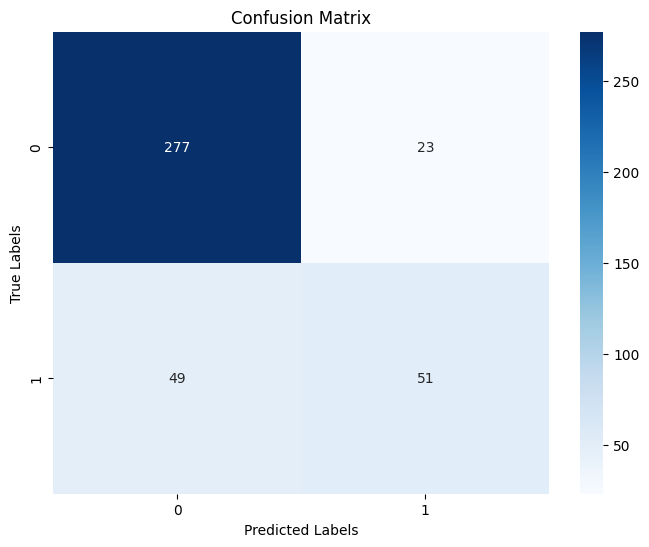

2024-07-03 19:47:56,154 - __main__ - INFO - Validation random samples completed
INFO:__main__:Validation random samples completed


In [31]:
logger.info(f'Validation random samples Started')
# Determine the sample size
sample_size = 2000

# Select a random sample
sample = df.sample(n=sample_size, random_state=42)# split data into X and y
X_validation = sample.drop('Customer Status', axis=1)
y_validation = sample['Customer Status']

X_train, X_test, y_train, y_test = train_test_split(X_validation, y_validation, test_size=0.2, random_state=42)

# Create the base model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)
bestparams = str(grid_search.best_params_)
bestscore = grid_search.best_score_
# Print the best parameters and the best score
print(f"Validation Best Parameters: ", {bestparams})
print(f"Validation Best Score: ", {bestscore})

# Use the best model to make predictions on the test set
y_pred = grid_search.predict(X_test)


# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

logger.info(f'Validation random samples completed')